In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf

In [5]:
A=pd.read_csv('housing.csv', index_col=0)

In [6]:
A.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


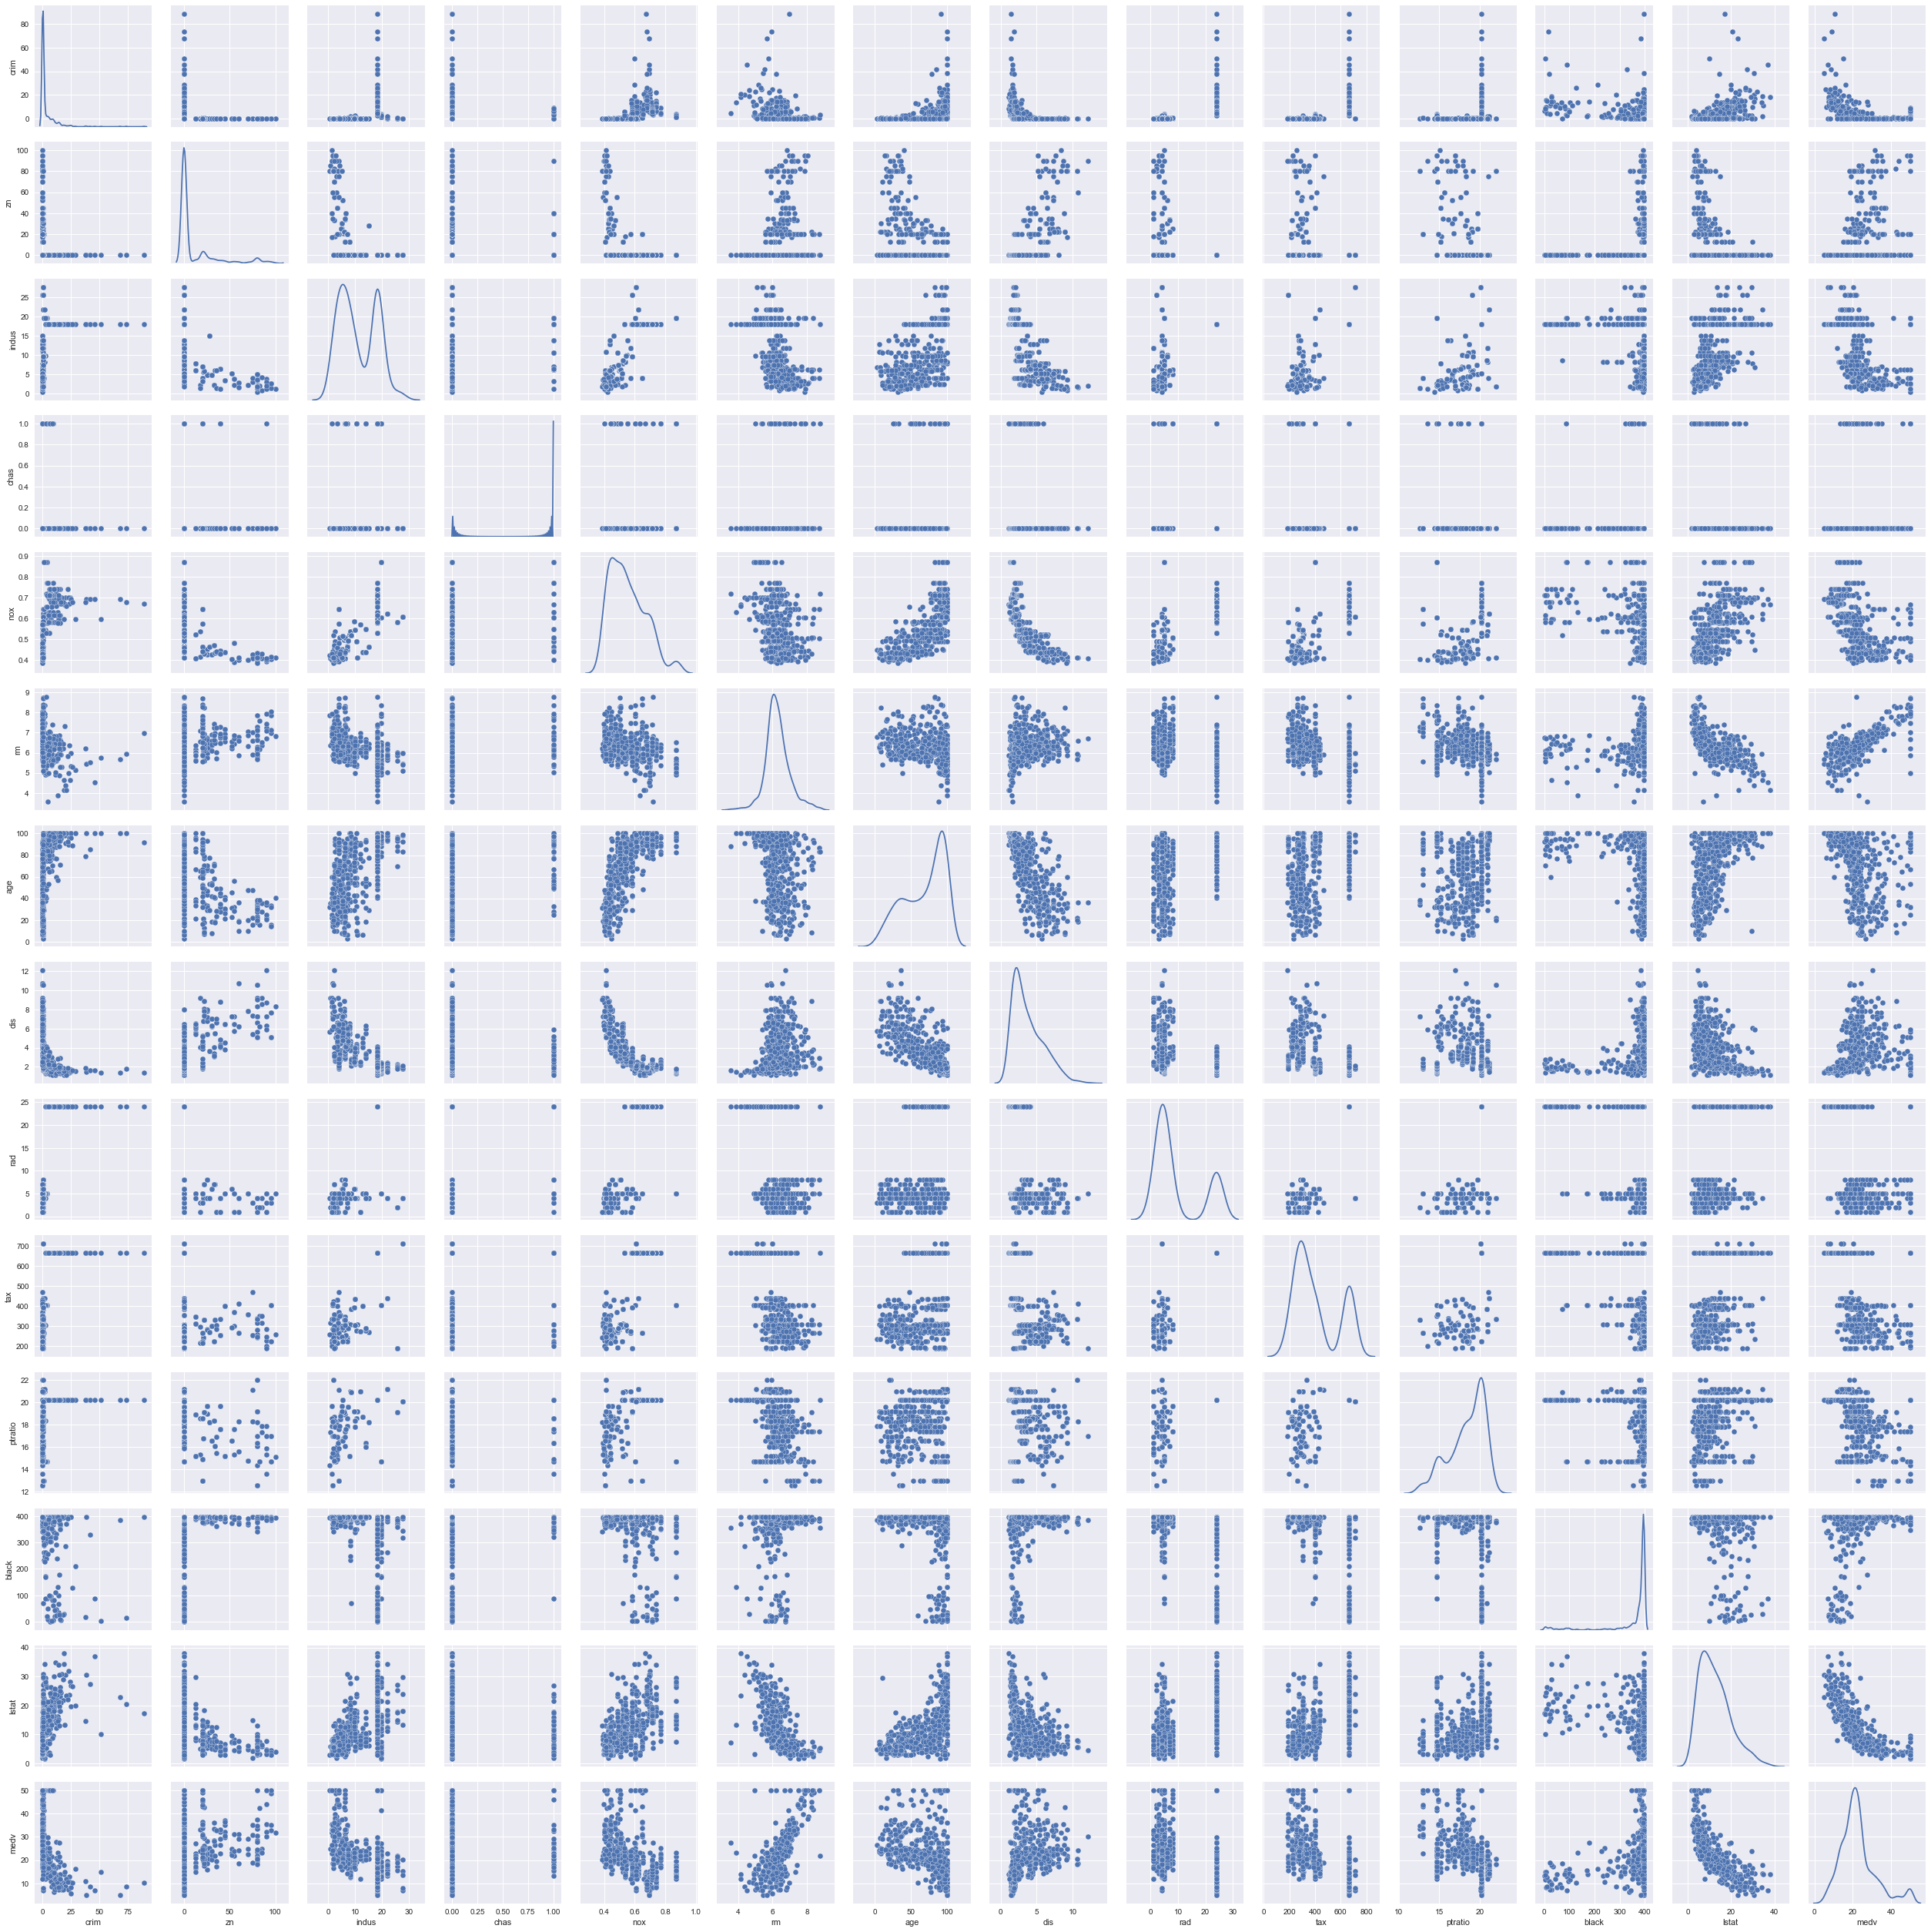

In [8]:
sns.pairplot(A,diag_kind='kde')

In [10]:
#Here istat wrt to medv i have a negative correlation but we cannot use a linear model as it is curved. if we use
#linear model rmse will be high. so we ll use quadratic model.

In [16]:
y= A[['medv']] #housing value in 1000$
x=A[['lstat']] # lower status of population

In [17]:
lm=LinearRegression()
lm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
lm_predict=lm.predict(x)
lm_rmse= np.sqrt(np.sum((lm_predict-y)**2/len(y)))
lm_rmse

medv    6.203464
dtype: float64

# Quadratic Regression Model

In [52]:
qr=PolynomialFeatures(degree=2)
x_qr=qr.fit_transform(x)

In [56]:
x_qr=pd.DataFrame(x_qr)
x_qr.head()
x_qr.drop(0, axis=1)


,1,2
0,4.98,24.8004
1,9.14,83.5396
2,4.03,16.2409
3,2.94,8.6436
4,5.33,28.4089
5,5.21,27.1441
6,12.43,154.5049
7,19.15,366.7225
8,29.93,895.8049
9,17.10,292.4100


In [58]:
m2=LinearRegression()
m2.fit(x_qr,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
y2_predict=m2.predict(x_qr)

In [60]:
qr_rmse= np.sqrt(np.sum((y2_predict-y)**2/len(y)))
qr_rmse

medv    5.507315
dtype: float64

In [107]:
qr=PolynomialFeatures(degree=7)
x_qr=qr.fit_transform(x)

x_qr_df=pd.DataFrame(x_qr)
idx=np.arange(506)

In [108]:
y.index=idx
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [109]:
x_qr_df=x_qr_df.drop(0, axis=1)
x_qr_df.head()

,1,2,3,4,5,6,7
0,4.98,24.8004,123.505992,615.059840,3062.998004,15253.730060,7.596358e+04
1,9.14,83.5396,763.551944,6978.864768,63786.823981,583011.571186,5.328726e+06
2,4.03,16.2409,65.450827,263.766833,1062.980336,4283.810755,1.726376e+04
3,2.94,8.6436,25.412184,74.711821,219.652754,645.779096,1.898591e+03
4,5.33,28.4089,151.419437,807.065599,4301.659644,22927.845901,1.222054e+05


In [116]:
x_qr_df=pd.concat([x_qr_df,y])


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [117]:
m3= LinearRegression()
m3.fit(x_qr,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
y3_predict=m3.predict(x_qr)

In [119]:
qr_rmse2= np.sqrt(np.sum((y3_predict-y)**2/len(y)))
qr_rmse2

medv    5.174982
dtype: float64

In [120]:
x_qr_df.columns= ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'medv']

In [121]:
m0=smf.ols('medv~f1+f2+f3+f4+f5+f6+f7', x_qr_df).fit()

ValueError: zero-size array to reduction operation maximum which has no identity